<a href="https://colab.research.google.com/github/radhika3131/Deep_Learning_with_Python/blob/main/ch_07_Intruduction_to_deep_learning_for_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to convnets

The following listing shows what a basic convnet looks like. It's a stack of *Conv* and *MaxPooling2D layers*. You'll see in a minute exactly what they do. We'll build the model using the *Functional API*, which we introduced in the previous chapter.

**Installing a small convnet**

In [1]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x) # this will give output in the form of rant--3 tensors(3D) , now we need to feed this output to a classifer vectors which are 1D such as dense layer .
x = layers.Flatten()(x) # So t convert 3d output into 1d we used flatten layer before adding dense layer
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

 NOTE: a convent takes as input tensors of shape (image height , image width , image channels) , not including batch dimension

In [2]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

You can see the output of Conv2D and Maxpooling2D layer is a rank-3 tensor of shape(height , width , channels) . THe width and height are tend to shrink as we gop deper into the model. The numner of channels is controlled by the\\first argument passed to the Conv2D(32,64 or 128).
after the last Con2D layer , we end up with n output of shape(3,3,128).
Next step is to feed output to densly connected vectors .Thes  classifer vectors which are 1D whereas output is rant-3 tensor .So to convert 3d output into 1d we used flatten layer before adding dense layer .

Finally we do 10 ways classification so our last layer has 10 outputs and a softmax activation.

Now lets train the convnets on MNIST dataset.

**Training the convnet on MNIST dataset**

In [3]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
938/938 [==============================] - 14s 4ms/step - loss: 0.1659 - accuracy: 0.9485
Epoch 2/5
938/938 [==============================] - 3s 4ms/step - loss: 0.0467 - accuracy: 0.9855
Epoch 3/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0319 - accuracy: 0.9895
Epoch 4/5
938/938 [==============================] - 3s 4ms/step - loss: 0.0241 - accuracy: 0.9924
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0179 - accuracy: 0.9943


**Evaluating the convnt**

In [4]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0282 - accuracy: 0.9917
Test accuracy: 0.992


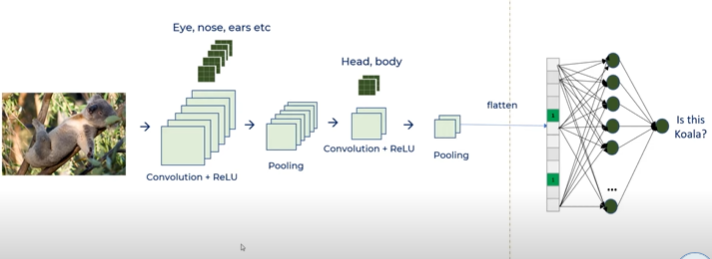

#The Convolutional operation

The fundamental difference between a densely connected layer and a convolution laver is this Dense layers learn global patterns in their input feature space (for exam ple, for a MNIST digit, patterns involving all pixels), whereas convolution layers learn local patterns

This key characteristic gives two intresting properties:
1. the pattern they learn are translation-invariant
2.they can learn spatial hieararchies of patterns


Convolutional are defined by two key parameters:
1. Size of patches extracted from the inputs
2. Depth of the output feature map

Note: That the output width and height may differ from the input width and height for two reasons:
1. Border effect , which can be countered by padding the input feature map
2. The use of strides



**Understanding Border effects and padding**

Consider a 5*5 feature map (25 tiles total) . There are only 9 tiles around which you can centre a 3*3 window, forming 3*3 grid, hense the output feature map will be 3*3. It shrinks a little.

If we want to get an output feature map with the same spatial dimension as the input feature map , we can use padding .
padding consists of adding an appropriate number of rows and coulumns on each side of the input feature map so as to make it possible to fit centre convolutional windows around every input file.



**Understanding Convolutional stride**

 The distance between two successive windows is a paramter of the convolution, called as its strides , which is by default is 1 .

**The max pooling operation**

Max pooling consists of extracting windows from the input feature maps and outputting the max value of each channel. A big difference from convolution is that max pooling is usually done with 2*2 windows , and stride 2 , in order to downsample the feature maps by a factor of 2. On the other hand  , convolutional is typically done with 3*3 windows and no stride(stride 1)


**An Incorrectly structured convet missing its max pooling layers**

In [5]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs)

In [6]:
model_no_max_pool.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 flatten_1 (Flatten)         (None, 61952)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                619530    
                                                                 
Total params: 712,202
Trainable params: 712,202
Non-trainab

#**Training a convnet from scratch on a small dataset**

**Downloading the data**

Now upload the kaggle.json file

In [7]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"radhikaramsen","key":"93cb62c99c340787605f80117247ce36"}'}

Install kaggle API client

In [8]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


kaggle API client expects the file to be in ~/.kaggle

so move it there

In [9]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

we need to set permissions

In [10]:
!chmod 600 /root/.kaggle/kaggle.json

list all available datasets

In [11]:
!kaggle datasets list

ref                                                                   title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                                 Data Science Salaries 2023 💸                         25KB  2023-04-13 09:55:16          36288       1008  1.0              
tawfikelmetwally/automobile-dataset                                   Car information dataset                               6KB  2023-05-28 18:26:48           5448        144  0.9411765        
fatihb/coffee-quality-data-cqi                                        Coffee Quality Data (CQI May-2023)                   22KB  2023-05-12 13:06:39           7284        153  1.0              
mohithsairamreddy/salary-data 

download the dataset

In [12]:
!kaggle competitions download -c dogs-vs-cats

 99% 803M/812M [00:07<00:00, 163MB/s]
100% 812M/812M [00:09<00:00, 90.1MB/s]


If your file is a zip file you can unzip with the following code

In [13]:
!unzip -qq /content/dogs-vs-cats.zip


In [14]:
!unzip -qq /content/train.zip

After downloading the data we will uncompress it , we will create a new dataset containing three subsets:
1. training set with 1000 samples from each class(cat and dog)
2. validation set with 500 samples from each class
3. test set with 1000 sample from each class

**Copying images to training , validation and test dataset**

In [15]:
import os, shutil, pathlib

original_dir = pathlib.Path("/content/train")
new_base_dir = pathlib.Path("cats_vs_dogs_smalldataset")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

#Building the model

we are dealing with bigger images and a more complex problem , we will make our model more larger ;It will have two more Conv2D and Maxpooling2D stages.This further reduces the size of the feature map so they are not overly large when we reach the *Flatten Layer*.

Note:
The depth of the feature maps progressively increases in the model (from 32 to 255) and the size of the feature map decreases(from 80*80 to 7*7)

**Instantiating a small convnet for dogs vs. cats classification**

In [16]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3)) #The model expect RGB images of size 180*180
x = layers.Rescaling(1./255)(inputs) # rescale input to [0,1] range by dividing them by 255
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       

**Configuring the model for training**

In [17]:
model.compile(loss = "binary_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])

#Data Preprocessing

data should be formatted into appropriately preprocessed floating- point tensors before being fed into the model. Currently, the data sits on a drive as JPEG files, so the steps for getting it into the model are roughly as follows:

1 Read the picture files.

2 Decode the JPEG content to RGB grids of pixels.

3 Convert these into floating-point tensors.

4 Resize them to a shared size (we'll use 180 x 180).

5 Pack them into batches (we'll use batches of 32 images).


In particular, Keras features the utility function image dataset from directory(), which lets you quickly set up a data pipeline that can automatically turn image files on disk into batches of preprocessed tensors.

Calling image_dataset from directory (directory) will first list the subdirecto- ries of directory and assume each one contains images from one of our classes. It will then index the image files in each subdirectory. Finally, it will create and return a tf.data.Dataset object configured to read these files, shuffle them, decode them to tensors, resize them to a shared size, and pack them into batches.

In [18]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


**Displaying the shapes of the data and labels yielded by the dataset**

In [19]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Fitting the model using dataset**

we will use a *ModelCheckpoint*  call back to save the model after each epoch .
We will configure it with the path specfying where to save the file , as well as the argument save_best_only = True and monitor = "val_loss": they tell the callback to only save a new file when the current value of the val_loss metric is lower than at any previous time during training.
This gurantees that your saved file will always contain the sate of the model corresponding to its best performing training epoch . Aa a result we won't have to retrain a new model for a lower no. of epoches if we start overfitting

---



In [20]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 10s 105ms/step - loss: 0.6996 - accuracy: 0.4930 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 4s 65ms/step - loss: 0.6936 - accuracy: 0.5065 - val_loss: 0.6917 - val_accuracy: 0.5160
Epoch 3/30
63/63 [==============================] - 4s 63ms/step - loss: 0.6924 - accuracy: 0.5470 - val_loss: 0.6955 - val_accuracy: 0.5250
Epoch 4/30
63/63 [==============================] - 5s 83ms/step - loss: 0.6722 - accuracy: 0.5955 - val_loss: 0.6633 - val_accuracy: 0.5760
Epoch 5/30
63/63 [==============================] - 4s 64ms/step - loss: 0.6208 - accuracy: 0.6550 - val_loss: 0.6402 - val_accuracy: 0.6370
Epoch 6/30
63/63 [==============================] - 5s 80ms/step - loss: 0.5949 - accuracy: 0.6785 - val_loss: 0.6116 - val_accuracy: 0.6550
Epoch 7/30
63/63 [==============================] - 4s 63ms/step - loss: 0.5806 - accuracy: 0.7070 - val_loss: 0.6075 - val_accuracy: 0.6670
Epoch 8/30


**Displaying curves of loss and accuracy during training**


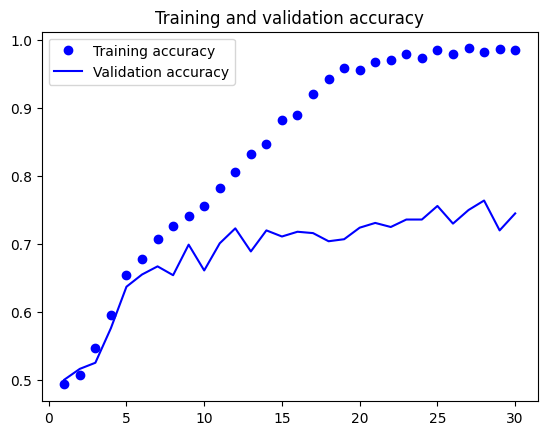

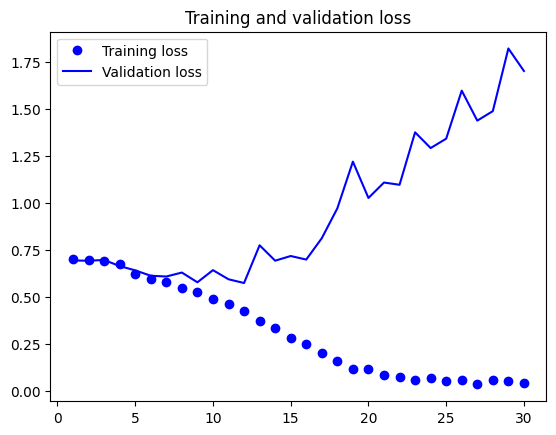

In [21]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

Lets check the test accuracy , we will reload the model from its saved file to evaluate it as it was before it started overfitting

**Evaluating the model on the test data**

In [22]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 3s 34ms/step - loss: 0.5890 - accuracy: 0.7315
Test accuracy: 0.732


**Using data augmentation**

taked the approach of generating more training data from existing training samples by augmenting the samples via a number of random transformation that yield believable - looking images

The gaol is that at training time , your model will never see the exact same picture twice .
In keras , this is done by adding a number of data augmentation layer at the start of your model

In [23]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

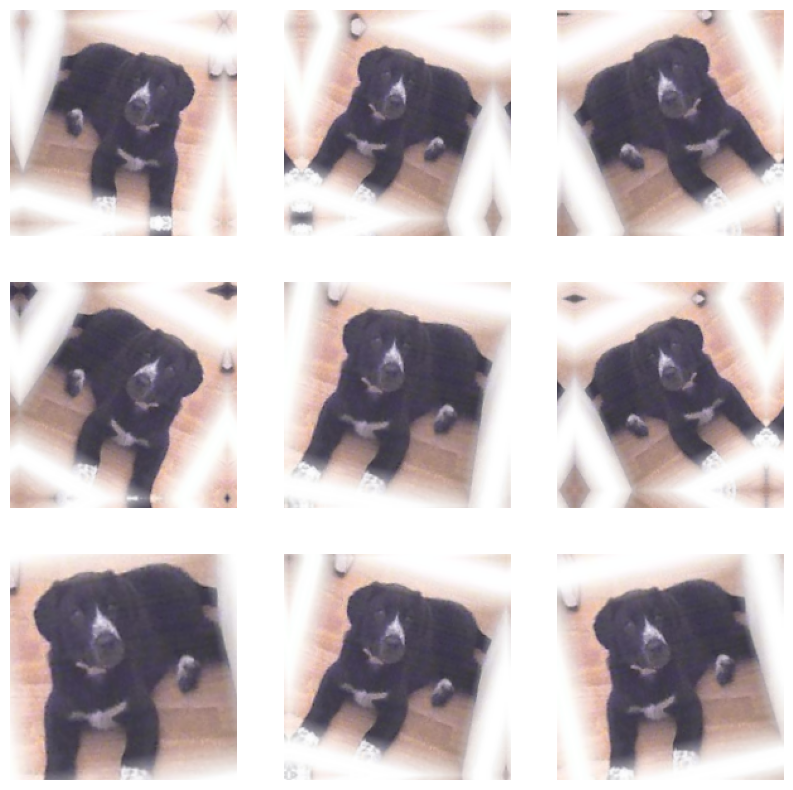

In [24]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Define a new convnet that includes images augmentation and dropout**

In [25]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

In [26]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 8s 84ms/step - loss: 0.6986 - accuracy: 0.5180 - val_loss: 0.6918 - val_accuracy: 0.5000
Epoch 2/100
63/63 [==============================] - 4s 65ms/step - loss: 0.6926 - accuracy: 0.5300 - val_loss: 0.9065 - val_accuracy: 0.5000
Epoch 3/100
63/63 [==============================] - 4s 66ms/step - loss: 0.7009 - accuracy: 0.5470 - val_loss: 0.6756 - val_accuracy: 0.6490
Epoch 4/100
63/63 [==============================] - 6s 81ms/step - loss: 0.6701 - accuracy: 0.5950 - val_loss: 0.6800 - val_accuracy: 0.5350
Epoch 5/100
63/63 [==============================] - 4s 66ms/step - loss: 0.6610 - accuracy: 0.6255 - val_loss: 0.6512 - val_accuracy: 0.5640
Epoch 6/100
63/63 [==============================] - 5s 83ms/step - loss: 0.6312 - accuracy: 0.6500 - val_loss: 0.7243 - val_accuracy: 0.5400
Epoch 7/100
63/63 [==============================] - 4s 66ms/step - loss: 0.6130 - accuracy: 0.6655 - val_loss: 0.5825 - val_accuracy: 0.6840
Epoch 

**Evaluating the model on the test set**

In [29]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss , test_acc =  test_model.evaluate(test_dataset)
print(f"test accuarcy : {test_acc:.3f}")

63/63 [==============================] - 2s 33ms/step - loss: 0.4045 - accuracy: 0.8330
test accuarcy : 0.833


**Feature extraction with pretrained model**

Instantiating the VGG16 convolutional base

In [30]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [31]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

**Fast feature extraction without data augmentation**

Extracting the VGG16 features and corresponding labels

In [33]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 22ms/step


In [34]:
train_features.shape

(2000, 5, 5, 512)

**Defining and training the densely connected classifier**

In [35]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 2s 9ms/step - loss: 15.2997 - accuracy: 0.9250 - val_loss: 3.2463 - val_accuracy: 0.9780
Epoch 2/20
63/63 [==============================] - 0s 6ms/step - loss: 4.4206 - accuracy: 0.9740 - val_loss: 8.9112 - val_accuracy: 0.9440
Epoch 3/20
63/63 [==============================] - 0s 5ms/step - loss: 2.3446 - accuracy: 0.9835 - val_loss: 7.2030 - val_accuracy: 0.9620
Epoch 4/20
63/63 [==============================] - 0s 5ms/step - loss: 1.0039 - accuracy: 0.9925 - val_loss: 4.7340 - val_accuracy: 0.9750
Epoch 5/20
63/63 [==============================] - 0s 5ms/step - loss: 0.9430 - accuracy: 0.9935 - val_loss: 4.1901 - val_accuracy: 0.9760
Epoch 6/20
63/63 [==============================] - 0s 5ms/step - loss: 1.0563 - accuracy: 0.9900 - val_loss: 3.6680 - val_accuracy: 0.9760
Epoch 7/20
63/63 [==============================] - 0s 6ms/step - loss: 0.2335 - accuracy: 0.9975 - val_loss: 2.7710 - val_accuracy: 0.9860
Epoch 8/20
63/63 [=

**Plotting the results**

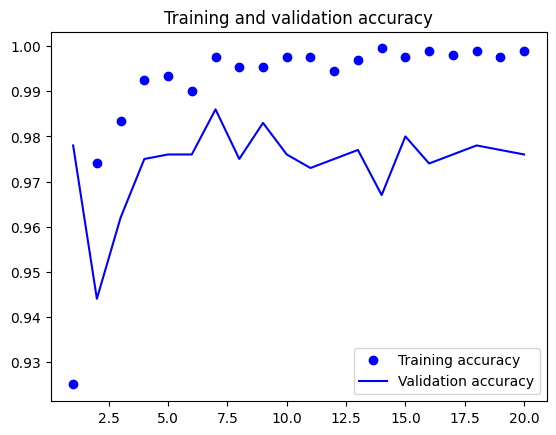

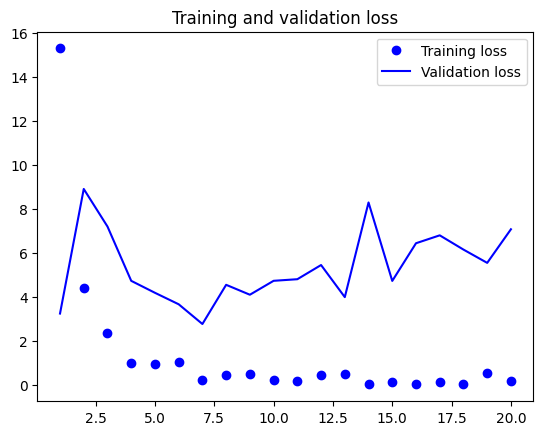

In [36]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Feature extraction together with data augmentation**

Instantiating and freezing the VGG16 convolutional base

In [37]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

**Printing the list of trainable weights before and after freezing**

In [38]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [39]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


**Adding a data augmentation stage and a classifier to the convolutional base**

In [40]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [41]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 11s 144ms/step - loss: 21.2998 - accuracy: 0.8870 - val_loss: 2.9655 - val_accuracy: 0.9730
Epoch 2/50
63/63 [==============================] - 10s 149ms/step - loss: 8.8243 - accuracy: 0.9480 - val_loss: 2.5534 - val_accuracy: 0.9760
Epoch 3/50
63/63 [==============================] - 11s 173ms/step - loss: 6.5052 - accuracy: 0.9555 - val_loss: 5.1926 - val_accuracy: 0.9670
Epoch 4/50
63/63 [==============================] - 9s 140ms/step - loss: 5.4753 - accuracy: 0.9550 - val_loss: 4.0516 - val_accuracy: 0.9740
Epoch 5/50
63/63 [==============================] - 9s 143ms/step - loss: 4.4951 - accuracy: 0.9695 - val_loss: 2.7533 - val_accuracy: 0.9770
Epoch 6/50
63/63 [==============================] - 9s 145ms/step - loss: 3.6323 - accuracy: 0.9725 - val_loss: 3.0043 - val_accuracy: 0.9780
Epoch 7/50
63/63 [==============================] - 9s 147ms/step - loss: 2.6211 - accuracy: 0.9770 - val_loss: 4.6017 - val_accuracy: 0.9720
Ep

**Evaluating the model on the test set**

In [42]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 6s 94ms/step - loss: 1.9106 - accuracy: 0.9790
Test accuracy: 0.979


**Fine-tuning a pretrained model**

In [43]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

**Freezing all layers until the fourth from the last**

In [45]:

conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

**Fine-tuning the model**

In [46]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 14s 175ms/step - loss: 0.5565 - accuracy: 0.9880 - val_loss: 1.5738 - val_accuracy: 0.9780
Epoch 2/30
63/63 [==============================] - 11s 165ms/step - loss: 0.1531 - accuracy: 0.9940 - val_loss: 1.9029 - val_accuracy: 0.9730
Epoch 3/30
63/63 [==============================] - 11s 165ms/step - loss: 0.1885 - accuracy: 0.9915 - val_loss: 1.6064 - val_accuracy: 0.9790
Epoch 4/30
63/63 [==============================] - 11s 167ms/step - loss: 0.2487 - accuracy: 0.9910 - val_loss: 1.7853 - val_accuracy: 0.9720
Epoch 5/30
63/63 [==============================] - 13s 196ms/step - loss: 0.1738 - accuracy: 0.9920 - val_loss: 1.9558 - val_accuracy: 0.9730
Epoch 6/30
63/63 [==============================] - 11s 169ms/step - loss: 0.1676 - accuracy: 0.9910 - val_loss: 1.8808 - val_accuracy: 0.9740
Epoch 7/30
63/63 [==============================] - 11s 171ms/step - loss: 0.3436 - accuracy: 0.9885 - val_loss: 1.5923 - val_accuracy: 0.9770

In [47]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 7s 95ms/step - loss: 1.2466 - accuracy: 0.9770
Test accuracy: 0.977


In [49]:
import cv2

In [50]:
test_image = cv2.imread("/content/dog.jpeg")

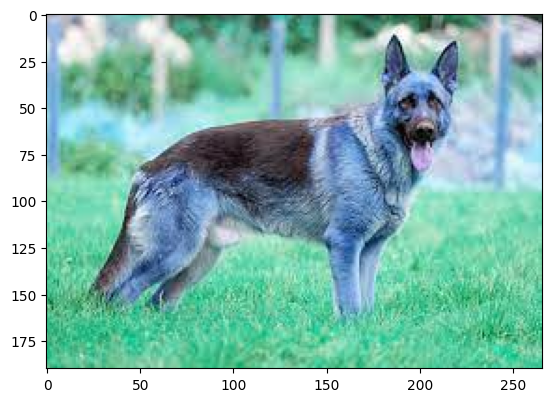

In [51]:
plt.imshow(test_image)

In [61]:
test_image.shape

(190, 266, 3)

In [75]:
from PIL import Image

# Open the image file
image = Image.open("/content/dog.jpeg")

# Resize the image to a specific width and height
new_width = 180
new_height = 180

resized_image = image.resize((new_width, new_height ))

# Save the resized image
resized_image.save("output_image.jpg")

In [76]:
%matplotlib inline

import numpy as np

import matplotlib.pyplot as plt

import time as time

test_image = cv2.imread("output_image.jpg")

test_image.shape

(190,266,3)

test_image.reshape((180,180,3))

array([[[159, 164, 165],
        [156, 159, 167],
        [155, 156, 177],
        ...,
        [ 42,  62,  50],
        [ 43,  63,  51],
        [ 50,  70,  58]],

       [[167, 174, 177],
        [168, 173, 182],
        [169, 171, 195],
        ...,
        [ 42,  61,  52],
        [ 44,  63,  54],
        [ 55,  74,  65]],

       [[174, 186, 192],
        [179, 188, 201],
        [187, 191, 216],
        ...,
        [ 33,  49,  42],
        [ 29,  45,  38],
        [ 39,  55,  48]],

       ...,

       [[103, 182, 138],
        [101, 197, 150],
        [ 75, 202, 150],
        ...,
        [ 66, 198, 151],
        [ 65, 197, 150],
        [ 64, 196, 149]],

       [[112, 191, 147],
        [ 91, 187, 140],
        [ 55, 182, 130],
        ...,
        [ 59, 191, 144],
        [ 61, 193, 146],
        [ 63, 195, 148]],

       [[116, 195, 151],
        [ 83, 179, 132],
        [ 41, 168, 116],
        ...,
        [ 63, 195, 148],
        [ 62, 194, 147],
        [ 62, 194, 147]]